In [17]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [18]:

pip install -U scikit-learn


In [19]:

!pip install --upgrade pandas




In [3]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout

In [4]:
df1 = pd.read_csv('Fake news during normal times - 1.csv')
df2 = pd.read_csv('Fake news during normal times - 2.csv')
df3 = pd.read_csv('Fake news during normal times un-labeled - 3.csv')
df4 = pd.read_csv('Syrian war fake news.csv',encoding='unicode_escape')
df5 = pd.read_csv('Iraq war fake news.csv')
df6 = pd.read_csv('afghanistan war unlabeled.csv',encoding='unicode_escape')
df7 = pd.read_csv('Ukraine war unlabeled - 1.csv')
df8 = pd.read_csv('Ukraine war unlabeled - 2.csv')

In [5]:
labels1=df1.label
labels1.head(5)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
labels2=df2.label
labels2.head(5)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [7]:
labels4=df4.label
labels4.head(5)

0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

In [8]:
labels5=df5.deception	
labels5.head(5)

0    False
1    False
2    False
3    False
4    False
Name: deception, dtype: bool

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df1['text'], df1['label'], test_size=0.2, random_state=7)
x_train1, x_test1, y_train1, y_test1 = train_test_split(df4['article_content'], df4['label'], test_size=0.2, random_state=7)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df5['content'], df5['deception'], test_size=0.2, random_state=7)
x_train4, x_test4, y_train4, y_test4 = train_test_split(df2['text'], df2['label'], test_size=0.2, random_state=7)

labels4 = df4['label']
labels4.head(5)
labels5 = df5['deception']
labels5.head(5)
labels2 = df2['label']
labels2.head(5)
labels1 = df1['label']
labels1.head(5)


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [10]:
# Initialize vectorizers
vectorizers = [
    TfidfVectorizer(stop_words='english', max_df=0.7),
    HashingVectorizer(stop_words='english'),
    CountVectorizer(stop_words='english'),
    # Add your additional vectorizer here
]

# Initialize classifiers
classifiers = [
    PassiveAggressiveClassifier(max_iter=50),
    LogisticRegression(max_iter=1000),
    SGDClassifier(),
    # Add your additional classifier here
]

# Initialize deep learning models
models = [
    # Convolutional Neural Network (CNN)
    Sequential([
        Embedding(input_dim=10000, output_dim=64),
        Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    # Deep Neural Network (DNN)
    Sequential([
        Dense(256, input_dim=10000, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
]

# Define dataset names and accuracy results list
datasets = [
    (x_train, y_train, x_test, y_test, 'Fake news during normal times - 1 Dataset'), 
    (x_train1, y_train1, x_test1, y_test1, 'Syrian war fake news Dataset'), 
    (x_train2, y_train2, x_test2, y_test2, 'Iraq war fake news Dataset'),
    (x_train4, y_train4, x_test4, y_test4, 'Fake news during normal times - 2 Dataset')
]

results = []


In [11]:

# Iterate over vectorizers, classifiers, models, and datasets
for vectorizer in vectorizers:
    for classifier in classifiers:
        for model in models:
            for data in datasets:
                x_train, y_train, x_test, y_test, dataset_name = data

                X_train = vectorizer.fit_transform(x_train)
                X_test = vectorizer.transform(x_test)

                clf_name = type(classifier).__name__
                vectorizer_name = type(vectorizer).__name__
                model_name = type(model).__name__
                if 'Neural' in model_name:
                    X_train = X_train.toarray()
                    X_test = X_test.toarray()

                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                    model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)
                    y_pred = model.predict(X_test)
                    y_pred = np.round(y_pred).astype(int)
                else:
                    classifier.fit(X_train, y_train)
                    y_pred = classifier.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                results.append((vectorizer_name, clf_name, model_name, dataset_name, accuracy))
                
# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Vectorizer', 'Classifier', 'Model', 'Dataset', 'Accuracy'])

# Map the vectorizer names
vectorizer_names = {
    'CountVectorizer': 'CV',
    'TfidfVectorizer': 'TF-IDF',
    'HashingVectorizer': 'Hashing'
}

# Map the classifier/model names
classifier_names = {
    'PassiveAggressiveClassifier': 'PAC',
    'LogisticRegression': 'LR',
    'SGDClassifier': 'SGD',
    'Conv1D': '(CNN)',
    'Sequential': '(DNN)'
}

# Create a new DataFrame with unique combinations of Vectorizer, Classifier/Model, and Accuracy
unique_results = results_df.groupby(['Vectorizer', 'Classifier', 'Model', 'Dataset']).mean().reset_index()

# Assign numeric labels to dataset names
dataset_labels = {name: i for i, name in enumerate(unique_results['Dataset'].unique())}

# Map the vectorizer names
vectorizer_names = {
    'CountVectorizer': 'CV',
    'TfidfVectorizer': 'TF-IDF',
    'HashingVectorizer': 'Hashing'
}

# Map the classifier/model names
classifier_names = {
    'PassiveAggressiveClassifier': 'PAC',
    'LogisticRegression': 'LR',
    'SGDClassifier': 'SGD',
    'Conv1D': '(CNN)',
    'Sequential': '(DNN)'
}


In [ ]:
pip install seaborn 

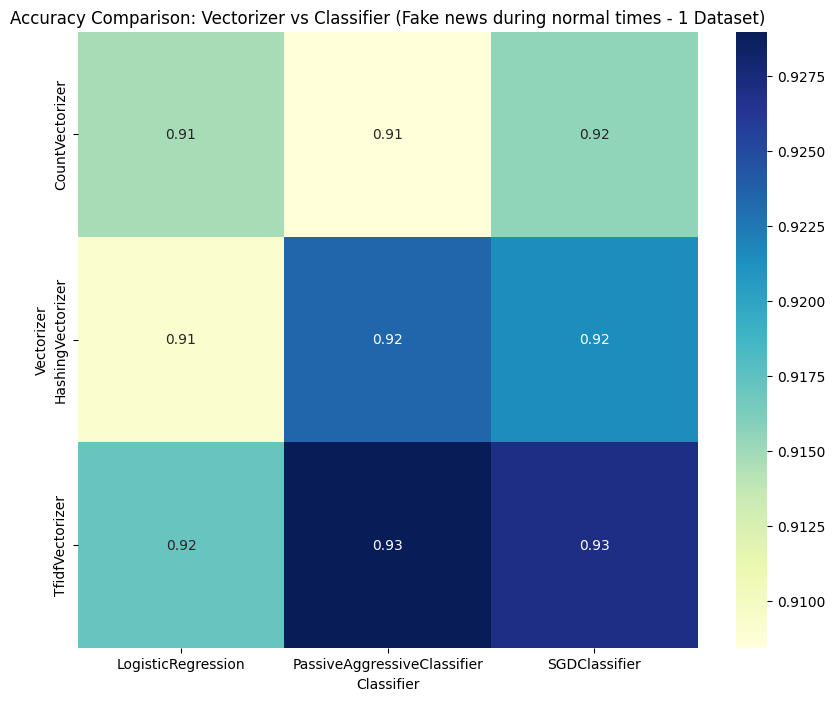

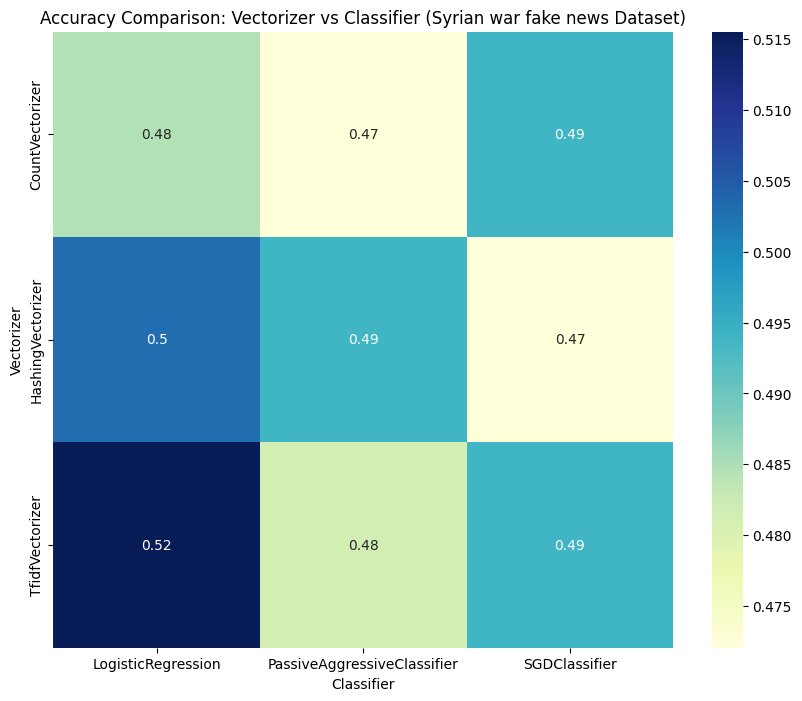

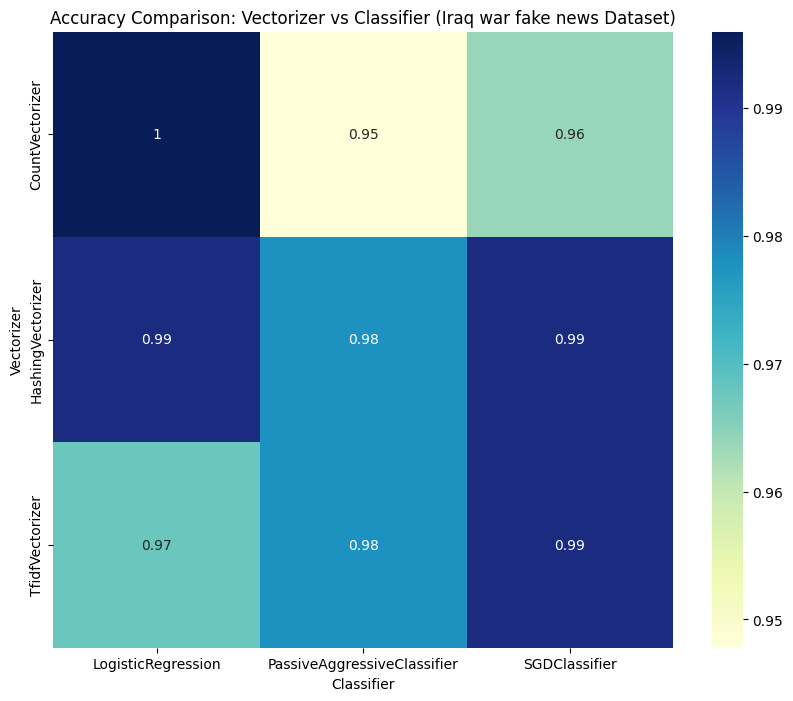

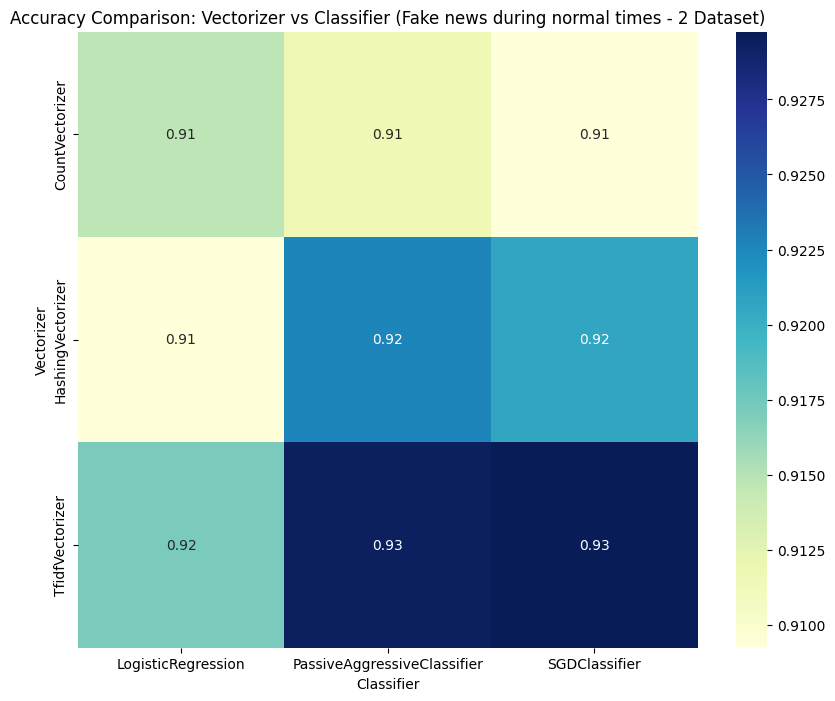

,Vectorizer,Classifier,Model,Dataset,Accuracy
4,TfidfVectorizer,PassiveAggressiveClassifier,Sequential,Fake news during normal times - 1 Dataset,0.929755
3,TfidfVectorizer,PassiveAggressiveClassifier,Sequential,Fake news during normal times - 2 Dataset,0.930545
46,HashingVectorizer,SGDClassifier,Sequential,Iraq war fake news Dataset,0.995984
9,TfidfVectorizer,LogisticRegression,Sequential,Syrian war fake news Dataset,0.515528


In [14]:


# Create a scatter plot
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter3d(
    x=unique_results['Classifier'].map(classifier_names),
    y=unique_results['Vectorizer'].map(vectorizer_names),
    z=unique_results['Accuracy'],
    mode='markers',
    marker=dict(
        size=10,
        color=unique_results['Dataset'].map(dataset_labels),
        colorscale='Viridis',
        opacity=0.8
    )
))

# Set axis labels
fig.update_layout(scene=dict(
    xaxis=dict(title='Classifier/Model'),
    yaxis=dict(title='Vectorizer'),
    zaxis=dict(title='Accuracy'),
))

# Add labels to data points
fig.update_layout(scene=dict(
    annotations=[
        dict(
            x=unique_results['Classifier'].map(classifier_names)[i],
            y=unique_results['Vectorizer'].map(vectorizer_names)[i],
            z=unique_results['Accuracy'][i],
            text="",
            showarrow=False,
            font=dict(size=12),
            xanchor='center',
            yanchor='bottom'
        ) for i in range(len(unique_results))
    ]
))

# Set plot title
fig.update_layout(title='Accuracy Comparison for Different Classifiers/Models and Vectorizers')

# Show the plot
fig.show()
import seaborn as sns 

# Get unique dataset names
dataset_names = results_df['Dataset'].unique()

# Iterate over dataset names
for dataset_name in dataset_names:
    # Filter results for the current dataset
    dataset_results = results_df[results_df['Dataset'] == dataset_name]

    # Pivot the dataset results
    pivot_table = dataset_results.pivot_table(index='Vectorizer', columns='Classifier', values='Accuracy')

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
    plt.title(f'Accuracy Comparison: Vectorizer vs Classifier ({dataset_name})')
    plt.xlabel('Classifier')
    plt.ylabel('Vectorizer')
    plt.show()
import pandas as pd

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Vectorizer', 'Classifier', 'Model', 'Dataset', 'Accuracy'])

# Group the results by 'Dataset' and find the row with the maximum accuracy for each group
best_results = results_df.groupby('Dataset')['Accuracy'].idxmax()
best_combinations = results_df.loc[best_results]

# Display the best accuracy combinations for each dataset using the head() method
best_combinations_head = best_combinations.head()
best_combinations_head.head()


In [15]:

# Create a scatter plot
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter3d(
    x=unique_results['Classifier'].map(classifier_names),
    y=unique_results['Vectorizer'].map(vectorizer_names),
    z=unique_results['Accuracy'],
    mode='markers',
    marker=dict(
        size=10,
        color=unique_results['Dataset'].map(dataset_labels),
        colorscale='Viridis',
        opacity=0.8
    )
))

# Set axis labels
fig.update_layout(scene=dict(
    xaxis=dict(title='Classifier/Model'),
    yaxis=dict(title='Vectorizer'),
    zaxis=dict(title='Accuracy'),
))

# Add labels to data points
fig.update_layout(scene=dict(
    annotations=[
        dict(
            x=unique_results['Classifier'].map(classifier_names)[i],
            y=unique_results['Vectorizer'].map(vectorizer_names)[i],
            z=unique_results['Accuracy'][i],
            text="",
            showarrow=False,
            font=dict(size=12),
            xanchor='center',
            yanchor='bottom'
        ) for i in range(len(unique_results))
    ]
))

# Set plot title
fig.update_layout(title='Accuracy Comparison for Different Classifiers/Models and Vectorizers')

# Show the plot
fig.show()


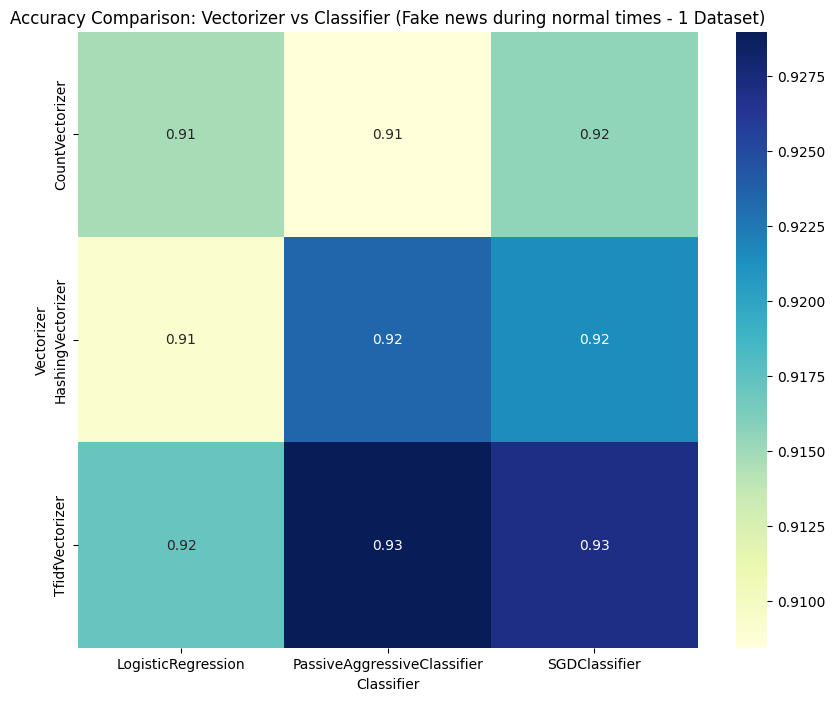

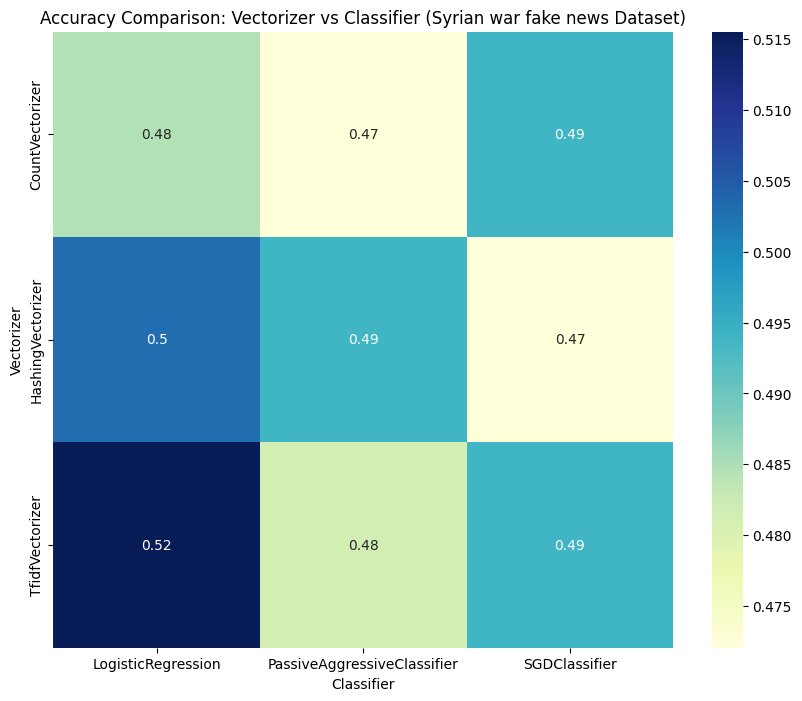

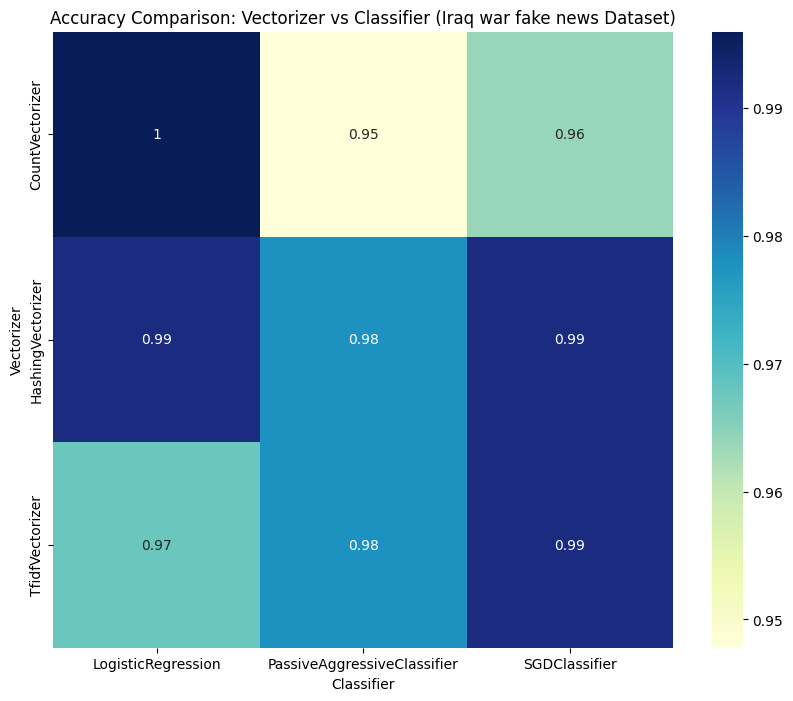

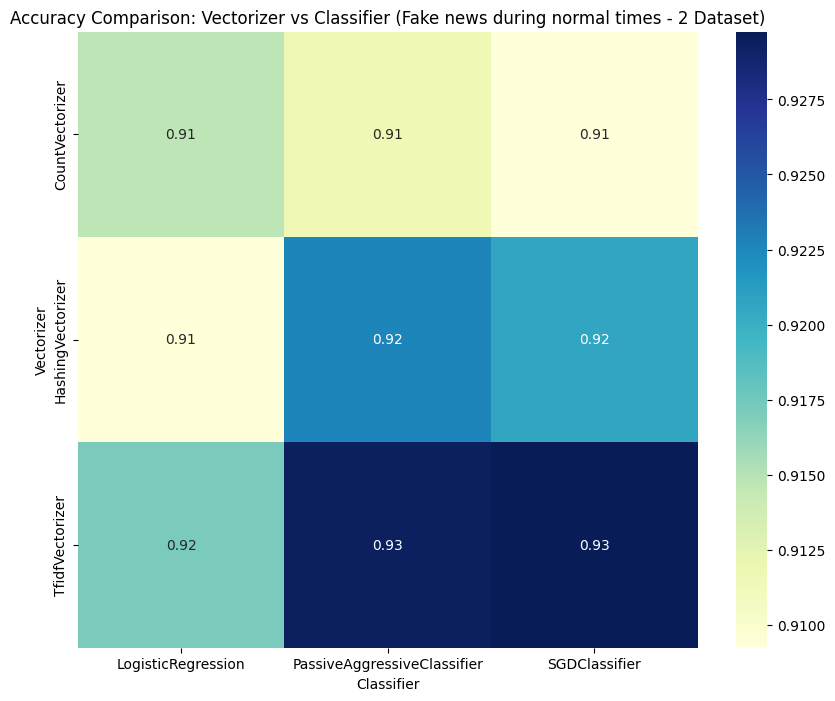

In [16]:
import seaborn as sns 

# Get unique dataset names
dataset_names = results_df['Dataset'].unique()

# Iterate over dataset names
for dataset_name in dataset_names:
    # Filter results for the current dataset
    dataset_results = results_df[results_df['Dataset'] == dataset_name]

    # Pivot the dataset results
    pivot_table = dataset_results.pivot_table(index='Vectorizer', columns='Classifier', values='Accuracy')

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
    plt.title(f'Accuracy Comparison: Vectorizer vs Classifier ({dataset_name})')
    plt.xlabel('Classifier')
    plt.ylabel('Vectorizer')
    plt.show()


In [17]:
import pandas as pd

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Vectorizer', 'Classifier', 'Model', 'Dataset', 'Accuracy'])

# Group the results by 'Dataset' and find the row with the maximum accuracy for each group
best_results = results_df.groupby('Dataset')['Accuracy'].idxmax()
best_combinations = results_df.loc[best_results]

# Display the best accuracy combinations for each dataset using the head() method
best_combinations_head = best_combinations.head()
best_combinations_head.head()


,Vectorizer,Classifier,Model,Dataset,Accuracy
4,TfidfVectorizer,PassiveAggressiveClassifier,Sequential,Fake news during normal times - 1 Dataset,0.929755
3,TfidfVectorizer,PassiveAggressiveClassifier,Sequential,Fake news during normal times - 2 Dataset,0.930545
46,HashingVectorizer,SGDClassifier,Sequential,Iraq war fake news Dataset,0.995984
9,TfidfVectorizer,LogisticRegression,Sequential,Syrian war fake news Dataset,0.515528


Average Results:
                                      Dataset         Vectorizer  Accuracy
0   Fake news during normal times - 1 Dataset    CountVectorizer  0.912918
1   Fake news during normal times - 1 Dataset  HashingVectorizer  0.918048
2   Fake news during normal times - 1 Dataset    TfidfVectorizer  0.924362
3   Fake news during normal times - 2 Dataset    CountVectorizer  0.911865
4   Fake news during normal times - 2 Dataset  HashingVectorizer  0.917522
5   Fake news during normal times - 2 Dataset    TfidfVectorizer  0.925414
6                  Iraq war fake news Dataset    CountVectorizer  0.969210
7                  Iraq war fake news Dataset  HashingVectorizer  0.987282
8                  Iraq war fake news Dataset    TfidfVectorizer  0.979250
9                Syrian war fake news Dataset    CountVectorizer  0.483437
10               Syrian war fake news Dataset  HashingVectorizer  0.489648
11               Syrian war fake news Dataset    TfidfVectorizer  0.496894


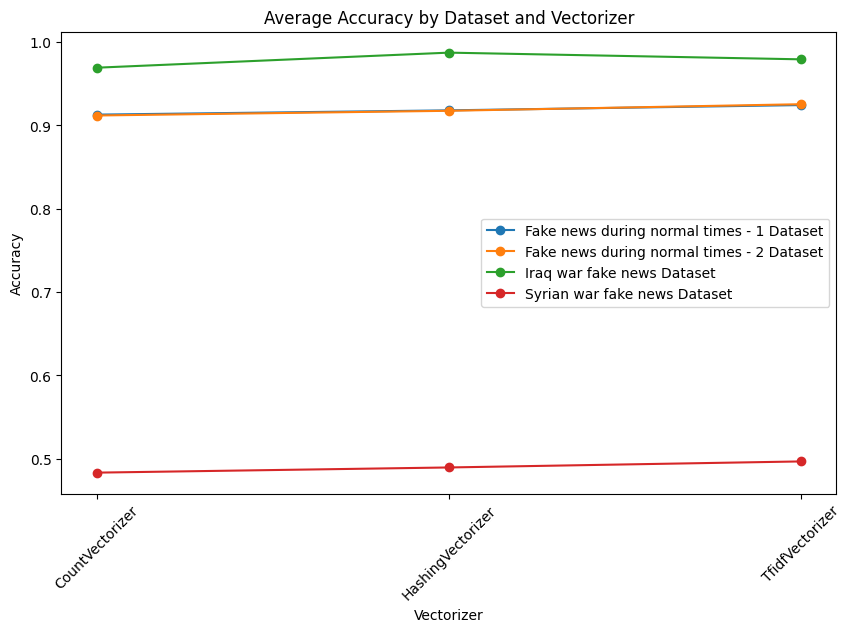

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Vectorizer', 'Classifier', 'Model', 'Dataset', 'Accuracy'])

# Compute average accuracy by Dataset and Vectorizer
average_results = results_df.groupby(['Dataset', 'Vectorizer'])['Accuracy'].mean().reset_index()

# Print the average results table
print("Average Results:")
print(average_results)

# Visualize average accuracy by Dataset and Vectorizer
fig, ax = plt.subplots(figsize=(10, 6))
for dataset in average_results['Dataset'].unique():
    dataset_results = average_results[average_results['Dataset'] == dataset]
    ax.plot(dataset_results['Vectorizer'], dataset_results['Accuracy'], marker='o', label=dataset)

ax.set_title('Average Accuracy by Dataset and Vectorizer')
ax.set_xlabel('Vectorizer')
ax.set_ylabel('Accuracy')
ax.legend()
plt.xticks(rotation=45)
plt.show()



Average Results:
                                      Dataset                   Classifier  \
0   Fake news during normal times - 1 Dataset           LogisticRegression   
1   Fake news during normal times - 1 Dataset  PassiveAggressiveClassifier   
2   Fake news during normal times - 1 Dataset                SGDClassifier   
3   Fake news during normal times - 2 Dataset           LogisticRegression   
4   Fake news during normal times - 2 Dataset  PassiveAggressiveClassifier   
5   Fake news during normal times - 2 Dataset                SGDClassifier   
6                  Iraq war fake news Dataset           LogisticRegression   
7                  Iraq war fake news Dataset  PassiveAggressiveClassifier   
8                  Iraq war fake news Dataset                SGDClassifier   
9                Syrian war fake news Dataset           LogisticRegression   
10               Syrian war fake news Dataset  PassiveAggressiveClassifier   
11               Syrian war fake news Dataset  

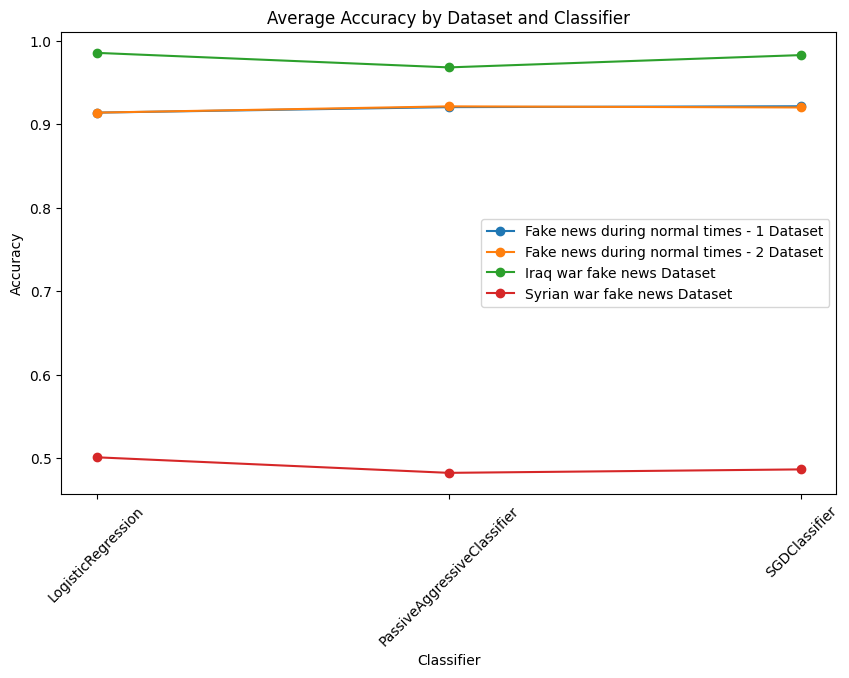

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Vectorizer', 'Classifier', 'Model', 'Dataset', 'Accuracy'])

# Compute average accuracy by Dataset and Classifier
average_results = results_df.groupby(['Dataset', 'Classifier'])['Accuracy'].mean().reset_index()

# Print the average results table
print("Average Results:")
print(average_results)

# Visualize average accuracy by Dataset and Classifier
fig, ax = plt.subplots(figsize=(10, 6))
for dataset in average_results['Dataset'].unique():
    dataset_results = average_results[average_results['Dataset'] == dataset]
    ax.plot(dataset_results['Classifier'], dataset_results['Accuracy'], marker='o', label=dataset)

ax.set_title('Average Accuracy by Dataset and Classifier')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

# Convert string labels to binary integers
label_encoder = LabelEncoder()
df1['label'] = label_encoder.fit_transform(df1['label'])
df4['label'] = label_encoder.fit_transform(df4['label'])
df5['deception'] = label_encoder.fit_transform(df5['deception'])
df2['label'] = label_encoder.fit_transform(df2['label'])

# Define your datasets
datasets = [
    (df1['text'], df1['label'], 'Fake news during normal times - 1'),
    (df4['article_content'], df4['label'], 'Syrian war fake news'),
    (df5['content'], df5['deception'], 'Iraq war fake news'),
    (df2['text'], df2['label'], 'Fake news during normal times - 2')
]

# Define your classifiers and vectorizers
classifiers = [PassiveAggressiveClassifier(), LogisticRegression(), SGDClassifier()]
vectorizers = [TfidfVectorizer(), CountVectorizer(),HashingVectorizer()]

# Define the evaluation metrics you want to use
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

# Perform train-test split and evaluate models
results = []

for dataset in datasets:
    X, y, dataset_name = dataset
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
    
    for classifier in classifiers:
        for vectorizer in vectorizers:
            pipeline = make_pipeline(vectorizer, classifier)
            pipeline.fit(x_train, y_train)
            y_pred = pipeline.predict(x_test)
            
            evaluation_scores = {}
            for metric_name, metric_func in metrics.items():
                if metric_name == 'Precision':
                    score = metric_func(y_test, y_pred, pos_label=1)
                else:
                    score = metric_func(y_test, y_pred)
                evaluation_scores[metric_name] = score
            
            results.append({
                'Dataset': dataset_name,
                'Classifier': classifier.__class__.__name__,
                'Vectorizer': vectorizer.__class__.__name__,
                **evaluation_scores
            })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


In [26]:
results_df.head(200)

,Dataset,Classifier,Vectorizer,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Fake news during normal times - 1,PassiveAggressiveClassifier,TfidfVectorizer,0.926598,0.914861,0.939587,0.927059,0.926690
1,Fake news during normal times - 1,PassiveAggressiveClassifier,CountVectorizer,0.910813,0.895706,0.928458,0.911788,0.910937
2,Fake news during normal times - 1,PassiveAggressiveClassifier,HashingVectorizer,0.921863,0.905199,0.941176,0.922837,0.921999
3,Fake news during normal times - 1,LogisticRegression,TfidfVectorizer,0.915549,0.927869,0.899841,0.913640,0.915438
4,Fake news during normal times - 1,LogisticRegression,CountVectorizer,0.924230,0.921011,0.926868,0.923930,0.924249
5,Fake news during normal times - 1,LogisticRegression,HashingVectorizer,0.893449,0.893312,0.891892,0.892601,0.893438
6,Fake news during normal times - 1,SGDClassifier,TfidfVectorizer,0.930545,0.934189,0.925278,0.929712,0.930507
7,Fake news during normal times - 1,SGDClassifier,CountVectorizer,0.916338,0.902928,0.931638,0.917058,0.916446
8,Fake news during normal times - 1,SGDClassifier,HashingVectorizer,0.919495,0.928455,0.907790,0.918006,0.919412
9,Syrian war fake news,PassiveAggressiveClassifier,TfidfVectorizer,0.484472,0.488095,0.506173,0.496970,0.484336


In [27]:
print(results_df.to_string())

                              Dataset                   Classifier         Vectorizer  Accuracy  Precision    Recall  F1 Score   ROC AUC
0   Fake news during normal times - 1  PassiveAggressiveClassifier    TfidfVectorizer  0.926598   0.914861  0.939587  0.927059  0.926690
1   Fake news during normal times - 1  PassiveAggressiveClassifier    CountVectorizer  0.910813   0.895706  0.928458  0.911788  0.910937
2   Fake news during normal times - 1  PassiveAggressiveClassifier  HashingVectorizer  0.921863   0.905199  0.941176  0.922837  0.921999
3   Fake news during normal times - 1           LogisticRegression    TfidfVectorizer  0.915549   0.927869  0.899841  0.913640  0.915438
4   Fake news during normal times - 1           LogisticRegression    CountVectorizer  0.924230   0.921011  0.926868  0.923930  0.924249
5   Fake news during normal times - 1           LogisticRegression  HashingVectorizer  0.893449   0.893312  0.891892  0.892601  0.893438
6   Fake news during normal times - 1    

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert string labels to binary integers
label_encoder = LabelEncoder()
df1['label'] = label_encoder.fit_transform(df1['label'])
df4['label'] = label_encoder.fit_transform(df4['label'])
df5['deception'] = label_encoder.fit_transform(df5['deception'])
df2['label'] = label_encoder.fit_transform(df2['label'])

# Define your datasets
datasets = [
    (df1['text'], df1['label'], 'Fake news during normal times - 1'),
    (df4['article_content'], df4['label'], 'Syrian war fake news'),
    (df5['content'], df5['deception'], 'Iraq war fake news'),
    (df2['text'], df2['label'], 'Fake news during normal times - 2')
]

# Define your classifiers and vectorizers
classifiers = [PassiveAggressiveClassifier(), LogisticRegression(), SGDClassifier()]
vectorizers = [TfidfVectorizer(), CountVectorizer(), HashingVectorizer()]

# Define the evaluation metrics you want to use
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

# Perform train-test split and evaluate models
results = []

for dataset in datasets:
    X, y, dataset_name = dataset
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
    
    for classifier in classifiers:
        for vectorizer in vectorizers:
            pipeline = make_pipeline(vectorizer, classifier)
            pipeline.fit(x_train, y_train)
            y_train_pred = pipeline.predict(x_train)
            train_scores = {}
            
            for metric_name, metric_func in metrics.items():
                if metric_name == 'Precision':
                    score = metric_func(y_train, y_train_pred, pos_label=1)
                else:
                    score = metric_func(y_train, y_train_pred)
                train_scores[metric_name] = score
            
            results.append({
                'Dataset': dataset_name,
                'Classifier': classifier.__class__.__name__,
                'Vectorizer': vectorizer.__class__.__name__,
                **train_scores
            })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:4

                              Dataset                   Classifier  \
0   Fake news during normal times - 1  PassiveAggressiveClassifier   
1   Fake news during normal times - 1  PassiveAggressiveClassifier   
2   Fake news during normal times - 1  PassiveAggressiveClassifier   
3   Fake news during normal times - 1           LogisticRegression   
4   Fake news during normal times - 1           LogisticRegression   
5   Fake news during normal times - 1           LogisticRegression   
6   Fake news during normal times - 1                SGDClassifier   
7   Fake news during normal times - 1                SGDClassifier   
8   Fake news during normal times - 1                SGDClassifier   
9                Syrian war fake news  PassiveAggressiveClassifier   
10               Syrian war fake news  PassiveAggressiveClassifier   
11               Syrian war fake news  PassiveAggressiveClassifier   
12               Syrian war fake news           LogisticRegression   
13               Syr

In [48]:
results_df.head(100)

,Dataset,Classifier,Vectorizer,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Fake news during normal times - 1,PassiveAggressiveClassifier,TfidfVectorizer,1.000000,1.000000,1.000000,1.000000,1.000000
1,Fake news during normal times - 1,PassiveAggressiveClassifier,CountVectorizer,0.998224,0.998426,0.998033,0.998229,0.998225
2,Fake news during normal times - 1,PassiveAggressiveClassifier,HashingVectorizer,1.000000,1.000000,1.000000,1.000000,1.000000
3,Fake news during normal times - 1,LogisticRegression,TfidfVectorizer,0.953236,0.963783,0.942172,0.952855,0.953271
4,Fake news during normal times - 1,LogisticRegression,CountVectorizer,0.999211,1.000000,0.998426,0.999213,0.999213
5,Fake news during normal times - 1,LogisticRegression,HashingVectorizer,0.908445,0.911648,0.905193,0.908409,0.908455
6,Fake news during normal times - 1,SGDClassifier,TfidfVectorizer,0.996251,0.995678,0.996853,0.996265,0.996249
7,Fake news during normal times - 1,SGDClassifier,CountVectorizer,0.997632,1.000000,0.995279,0.997634,0.997640
8,Fake news during normal times - 1,SGDClassifier,HashingVectorizer,0.957380,0.974307,0.939811,0.956748,0.957435
9,Syrian war fake news,PassiveAggressiveClassifier,TfidfVectorizer,0.981337,0.969014,0.997101,0.982857,0.980094


In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the datasets for peace times and war times
peace_times_data = pd.concat([df1, df2])
war_times_data = pd.concat([df4, df5])

# Convert the text data to lists
peace_text = peace_times_data['text'].tolist()
war_text = war_times_data['content'].tolist()

# Join the text data into a single string
peace_text_combined = ' '.join(peace_text)
war_text_combined = ' '.join(war_text)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize the text data for peace times and war times
X_peace = vectorizer.fit_transform([peace_text_combined])
X_war = vectorizer.transform([war_text_combined])

# Get the feature names (keywords)
feature_names = vectorizer.get_feature_names()

# Calculate the differences in keyword usage
keyword_diff = {}
for i, feature in enumerate(feature_names):
    keyword_diff[feature] = X_peace[0, i] - X_war[0, i]

# Sort the keywords based on the difference in usage
sorted_keywords = sorted(keyword_diff.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 keywords with the highest difference in usage
top_keywords = sorted_keywords[:10]
for keyword, diff in top_keywords:
    print(f"Keyword: {keyword}\t Difference: {diff}")

# Convert the war_text Series to a list
war_text_list = war_text.tolist()

# Join the text data into a single string
war_text_combined = ' '.join(war_text_list)


TypeError: sequence item 0: expected str instance, float found